In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
#matplotlib inline

In [97]:
df = pd.read_csv('C:\\Users\\SOUMYA\\OneDrive\\Documents\\Trimister 4\\Application of Data Markets Insurance Markets and Banking (Credit Risk)\\CLUSTERING\\Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [99]:
df=df.drop(["Species"],axis=1)


In [100]:
df.dropna()
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [101]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
dtype: bool

<Axes: ylabel='SepalLengthCm'>

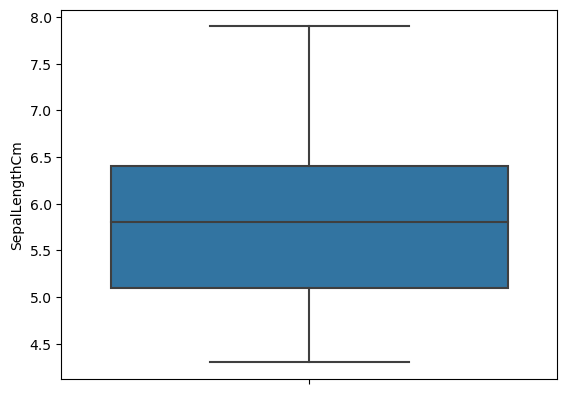

In [102]:
sns.boxplot(y='SepalLengthCm',data=df)

<Axes: ylabel='SepalWidthCm'>

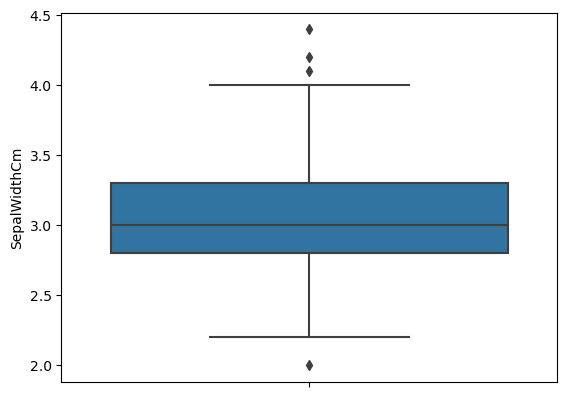

In [103]:
sns.boxplot(y='SepalWidthCm',data=df)

<Axes: ylabel='SepalWidthCm'>

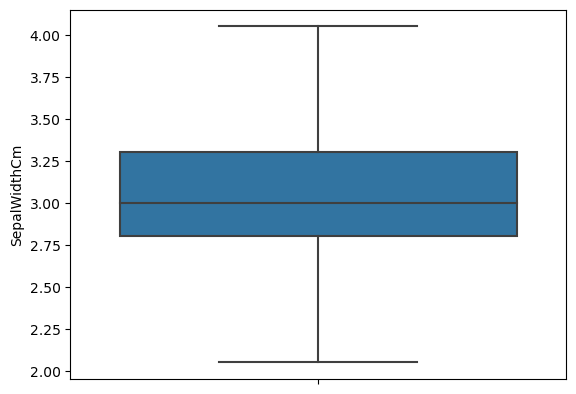

In [104]:
q1 = df["SepalWidthCm"].quantile(0.25)
q3 = df["SepalWidthCm"].quantile(0.75)
iqr = q3-q1
low = q1 - 1.5*iqr
high = q3+1.5*iqr
df["SepalWidthCm"]=np.where(df["SepalWidthCm"]<low,low,df["SepalWidthCm"])
df["SepalWidthCm"]=np.where(df["SepalWidthCm"]>high,high,df["SepalWidthCm"])
sns.boxplot(y="SepalWidthCm",data=df)

<Axes: ylabel='PetalLengthCm'>

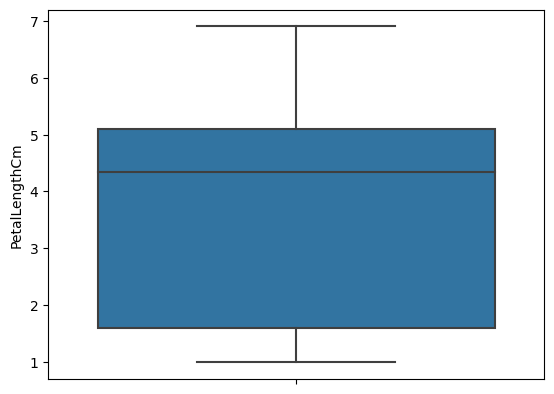

In [105]:
sns.boxplot(y='PetalLengthCm',data=df)

<Axes: ylabel='PetalWidthCm'>

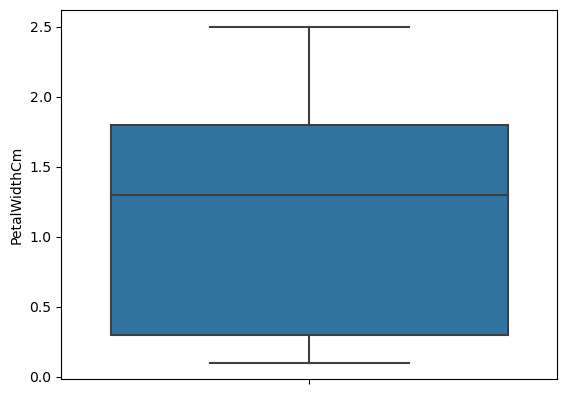

In [106]:
sns.boxplot(y="PetalWidthCm",data=df)

In [107]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397267,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.110343,0.871754,0.817954
SepalWidthCm,-0.397267,-0.110343,1.000000,-0.419823,-0.355582
PetalLengthCm,0.882747,0.871754,-0.419823,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.355582,0.962757,1.000000


<Axes: >

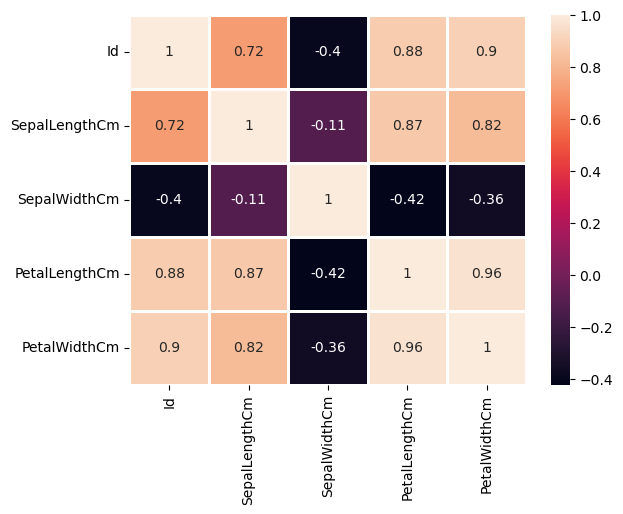

In [108]:
sns.heatmap(df.corr(),annot=True,linewidth = 2)

# Finding number of clusters


C:\Users\ajita\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ajita\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ajita\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ajita\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

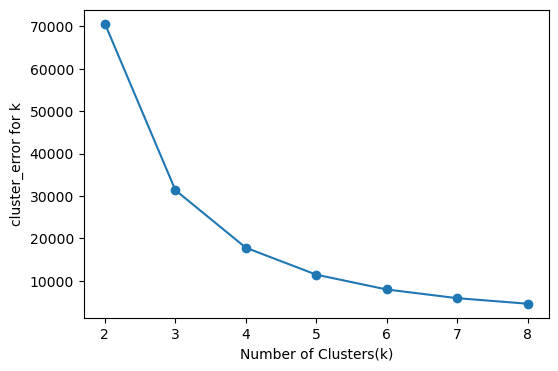

In [109]:
from sklearn.cluster import KMeans
cluster_error =[]
cluster_range = range(2,9)

for k in cluster_range:
    clusters = KMeans(k)
    clusters.fit(df)
    cluster_error.append(clusters.inertia_)
plt.figure(figsize = (6,4))
plt.plot(cluster_range, cluster_error, marker = "o")
plt.xlabel("Number of Clusters(k)")
plt.ylabel("cluster_error for k")
plt.show()

In [110]:
kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit(df)
df["Clusterid"] = clusters.labels_
df.head(10)

C:\Users\ajita\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ajita\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusterid
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
5,6,5.4,3.9,1.7,0.4,1
6,7,4.6,3.4,1.4,0.3,1
7,8,5.0,3.4,1.5,0.2,1
8,9,4.4,2.9,1.4,0.2,1
9,10,4.9,3.1,1.5,0.1,1


In [111]:
df["Clusterid"].unique()

array([1, 0, 2])

In [112]:
score_1 = silhouette_score(df,clusters.labels_)
score_1

0.5827758840637633

In [113]:
## 3 clusters will be formed.